Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [3]:
from glob import glob

In [4]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
##Ref:C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
import os
import tensorflow as tf

# Define the path to your training data directory
data_dir_train = r'C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration\Train'

# Verify the path
print("Training data directory exists:", os.path.exists(data_dir_train))

# Generates a tf.data.Dataset from the image files in the directory
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset='training',
)


Training data directory exists: True
Found 3739 files belonging to 9 classes.
Using 2992 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#Generates a tf.data.Dataset from the image files in the directory.
val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='validation',
            )##todo


Found 3739 files belonging to 9 classes.
Using 747 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

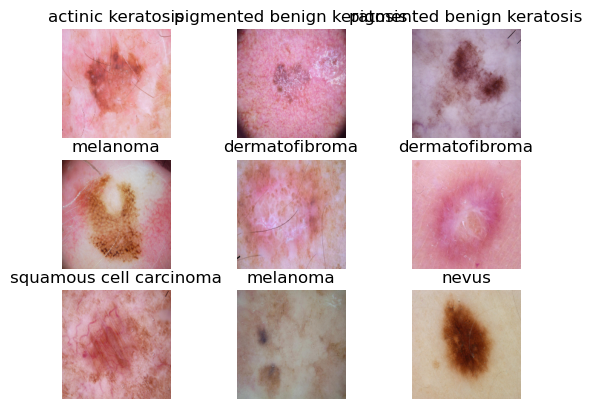

In [11]:
### your code goes here, you can use training or validation data to visualize
import matplotlib.pyplot as plt
for i in range(len(class_names)):
    filtered_ds = train_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[i]])
        plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
#The Keras sequence class helps create a layer cluster that is linearly stacked into a tf. keras. Model.
num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),    
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class)
])

C:\Users\dani_\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
#loss: Sparse Categorical Crossentropy Calculates the crossentropy loss between labels and predictions.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 62s 460ms/step - accuracy: 0.3514 - loss: 1.7326 - val_accuracy: 0.5100 - val_loss: 1.3964
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.5143 - loss: 1.3514 - val_accuracy: 0.5515 - val_loss: 1.2843
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 356ms/step - accuracy: 0.5772 - loss: 1.2122 - val_accuracy: 0.6078 - val_loss: 1.2108
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 343ms/step - accuracy: 0.6373 - loss: 1.0453 - val_accuracy: 0.5515 - val_loss: 1.2706
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 347ms/step - accuracy: 0.6721 - loss: 0.9148 - val_accuracy: 0.6158 - val_loss: 1.1836
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 341ms/step - accuracy: 0.7288 - loss: 0.8021 - val_accuracy: 0.6546 - val_loss: 1.0840
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 341ms/step - accuracy: 0.7709 - loss: 0.6736 - val_accuracy: 0.6506 - val_loss: 1.0701
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 338ms/step - accuracy: 0.7990 - loss: 0.6232 - val_accu

### Visualizing training results

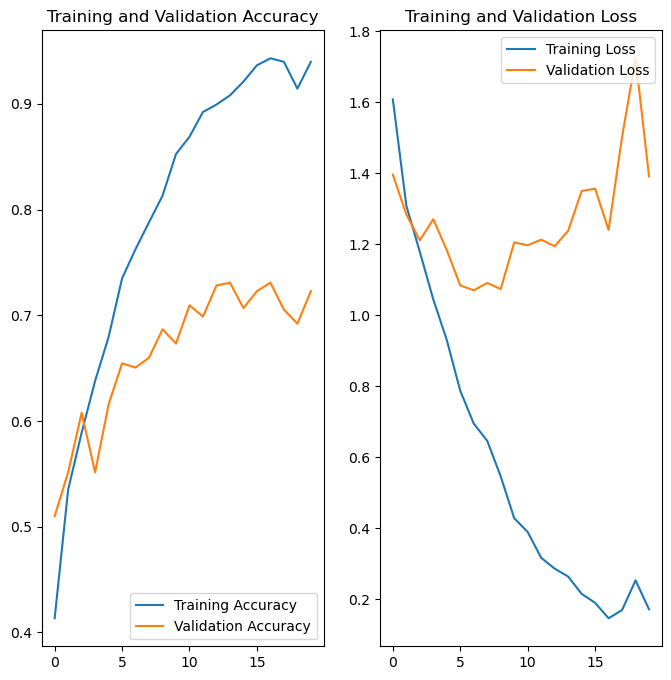

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
<h2>Findings:-</h2>
<p style="font-size:18px"> The above model is clearly the case of overfitting and the model doesn't seem to be learning anything from the dataset. <br/> 
   &nbsp;&nbsp; (1) Training accuracy is very high, while validation accuracy is around 50%. <br/> 
   &nbsp;&nbsp; (2) The loss on the training set decreases after each epoch, but in the case of the validation set, it climbs back again after the 5th epoch. <br/>
    <br/>
Instead of generalizing and learning real features and general relationships, the model memorized the data</p>

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3))
])


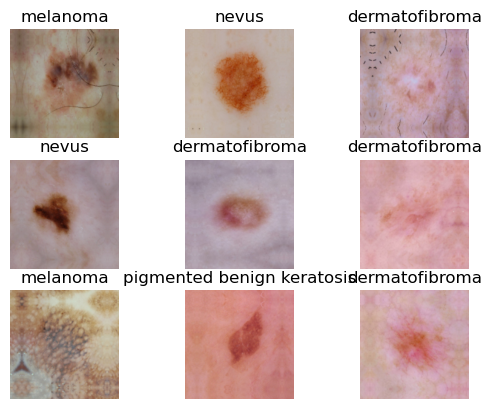

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for img, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augmentation(img)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## https://www.tensorflow.org/tutorials/images/data_augmentation
## https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip
## Your code goes here
#The Keras sequence class helps create a layer cluster that is linearly stacked into a tf. keras. Model.

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

### Compiling the model

In [21]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) ## your training code

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 474ms/step - accuracy: 0.3165 - loss: 1.8417 - val_accuracy: 0.4511 - val_loss: 1.4618
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 396ms/step - accuracy: 0.4499 - loss: 1.4795 - val_accuracy: 0.4980 - val_loss: 1.3740
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 399ms/step - accuracy: 0.5102 - loss: 1.3232 - val_accuracy: 0.5234 - val_loss: 1.2603
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 398ms/step - accuracy: 0.5322 - loss: 1.2966 - val_accuracy: 0.5141 - val_loss: 1.3133
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 39s 411ms/step - accuracy: 0.5348 - loss: 1.2574 - val_accuracy: 0.5167 - val_loss: 1.3550
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 393ms/step - accuracy: 0.5478 - loss: 1.2524 - val_accuracy: 0.5181 - val_loss: 1.3607
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 38s 398ms/step - accuracy: 0.5626 - loss: 1.1784 - val_accuracy: 0.5569 - val_loss: 1.2247
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 422ms/step - accuracy: 0.5748 - loss: 1.1744 - val_accu

### Visualizing the results

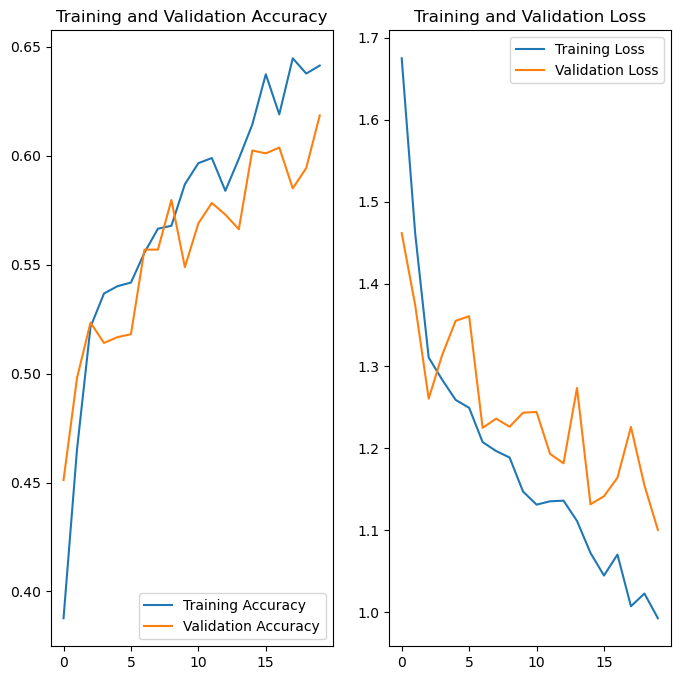

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
<h2>Findings:-</h2>
<p style="font-size:18px"> In the above model use of data augmentation and dropout layer reduced the problem of overfitting. <br/>
    <br/>The accuracy of the model has greatly increased along with the synchronization of the verification accuracy. The loss function is synchronously exhausted for the training and validation data.</p>

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.
## original_df - > path_list, lesion_list
path_list=[]
lesion_list=[]

In [25]:
import pathlib

# Correct path to your training data directory
data_dir_train = pathlib.Path(r'C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration\Train')

# Make sure class_names is a list of your class directories
class_names = ["Actinic_keratosis", "Basal_cell_carcinoma", "Dermatofibroma", "Melanoma", "Nevus", "Pigmented_benign_keratosis", "Seborrheic_keratosis", "Squamous_cell_carcinoma", "Vascular_lesion"]

path_list = []
lesion_list = []

for i in class_names:
    for j in data_dir_train.glob(i + '/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)

print("Sample paths:", path_list[:5])
print("Sample lesions:", lesion_list[:5])


Sample paths: ['C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\ISIC_0025223.jpg', 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\ISIC_0025302.jpg', 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\ISIC_0025314.jpg', 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\ISIC_0025373.jpg', 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\ISIC_0025504.jpg']
Sample lesions: ['Dermatofibroma', 'Dermatofibroma

In [26]:
for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Dermatofibroma
1,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Dermatofibroma
2,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Dermatofibroma
3,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Dermatofibroma
4,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Dermatofibroma
...,...,...
885,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Nevus
886,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Nevus
887,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Nevus
888,C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Me...,Nevus


<BarContainer object of 9 artists>

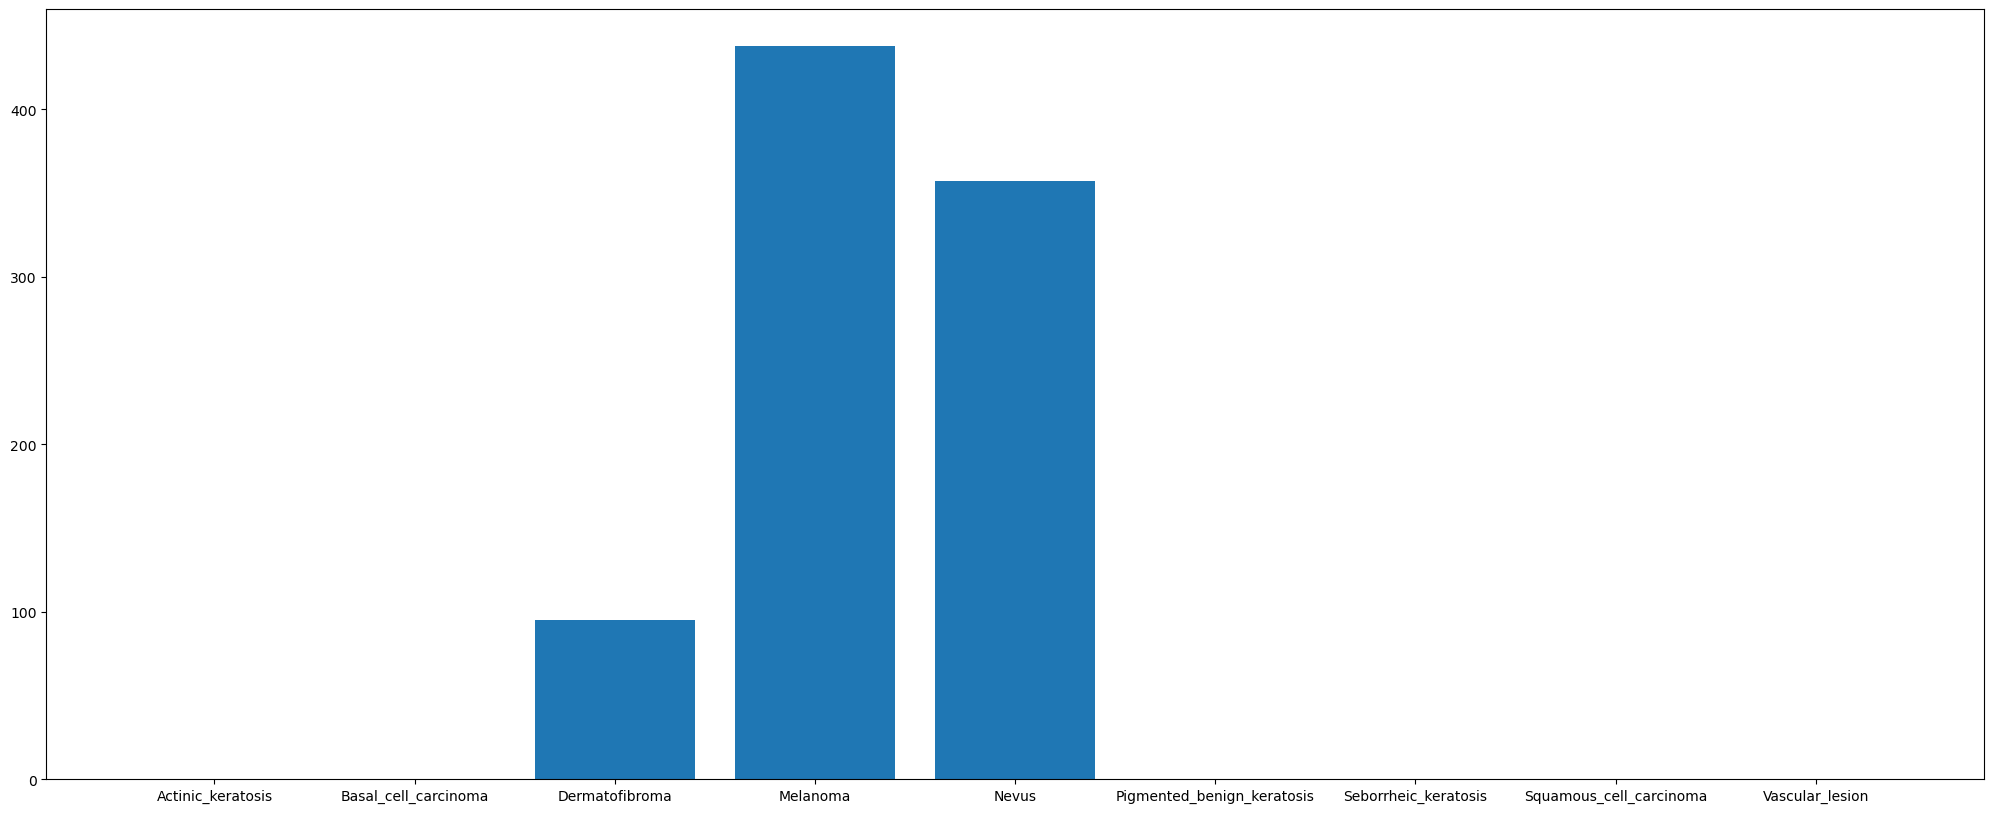

In [27]:
# glob('./Skin cancer ISIC The International Skin Imaging Collaboration/train/*/*')
# './Skin cancer ISIC The International Skin Imaging Collaboration/train\\actinic keratosis\\ISIC_0025780.jpg'
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
<p syle="size:18px">The least number of samples are in seborrheic keratosis</p>

#### - Which classes dominate the data in terms proportionate number of samples?
<p syle="size:18px">The classes dominate in the data are:- 
<br/> * pigmented benign
<br/> * melanoma
<br/>* basal cell carcinoma
<br/>* nevus</p>


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

Defaulting to user installation because normal site-packages is not writeable


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
import os
import Augmentor
import pathlib

# Define the path to your training dataset
path_to_training_dataset = pathlib.Path(r'C:C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration\Train')

# Verify the path exists
print("Training data directory exists:", path_to_training_dataset.exists())

# Get list of class directories
class_names = ["Actinic_keratosis", "Basal_cell_carcinoma", "Dermatofibroma", "Melanoma", "Nevus", "Pigmented_benign_keratosis", "Seborrheic_keratosis", "Squamous_cell_carcinoma", "Vascular_lesion"]

# Ensure the class directories exist
for class_name in class_names:
    class_dir = path_to_training_dataset / class_name
    print(f"Directory for {class_name} exists: {class_dir.exists()}")


Training data directory exists: False
Directory for Actinic_keratosis exists: False
Directory for Basal_cell_carcinoma exists: False
Directory for Dermatofibroma exists: False
Directory for Melanoma exists: False
Directory for Nevus exists: False
Directory for Pigmented_benign_keratosis exists: False
Directory for Seborrheic_keratosis exists: False
Directory for Squamous_cell_carcinoma exists: False
Directory for Vascular_lesion exists: False


In [30]:
import pathlib
import Augmentor

# Define the path to your training data directory as a pathlib.Path object
path_to_training_dataset = pathlib.Path(r'C:C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration\Train')

# Verify the path exists
print("Training data directory exists:", path_to_training_dataset.exists())


Training data directory exists: False


In [31]:
# Initialize Augmentor pipelines for each class
class_names = ["Actinic_keratosis", "Basal_cell_carcinoma", "Dermatofibroma", "Melanoma", "Nevus", "Pigmented_benign_keratosis", "Seborrheic_keratosis", "Squamous_cell_carcinoma", "Vascular_lesion"]

for class_name in class_names:
    class_dir = path_to_training_dataset / class_name
    if class_dir.exists():
        p = Augmentor.Pipeline(str(class_dir))
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)  # Adjust sample size as needed
    else:
        print(f"Error: The directory for {class_name} does not exist.")


Error: The directory for Actinic_keratosis does not exist.
Error: The directory for Basal_cell_carcinoma does not exist.
Error: The directory for Dermatofibroma does not exist.
Error: The directory for Melanoma does not exist.
Error: The directory for Nevus does not exist.
Error: The directory for Pigmented_benign_keratosis does not exist.
Error: The directory for Seborrheic_keratosis does not exist.
Error: The directory for Squamous_cell_carcinoma does not exist.
Error: The directory for Vascular_lesion does not exist.


In [32]:
import Augmentor

# Initialize Augmentor pipelines for each class
for class_name in class_names:
    class_dir = path_to_training_dataset / class_name
    if class_dir.exists():
        p = Augmentor.Pipeline(str(class_dir))
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        p.sample(500)  # Adjust sample size as needed
    else:
        print(f"Error: The directory for {class_name} does not exist.")


Error: The directory for Actinic_keratosis does not exist.
Error: The directory for Basal_cell_carcinoma does not exist.
Error: The directory for Dermatofibroma does not exist.
Error: The directory for Melanoma does not exist.
Error: The directory for Nevus does not exist.
Error: The directory for Pigmented_benign_keratosis does not exist.
Error: The directory for Seborrheic_keratosis does not exist.
Error: The directory for Squamous_cell_carcinoma does not exist.
Error: The directory for Vascular_lesion does not exist.


In [33]:
import pathlib

# Define the path to your training data directory as a raw string
path_to_training_dataset = pathlib.Path(r'C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration\Train')

# Verify the path exists
print("Training data directory exists:", path_to_training_dataset.exists())


Training data directory exists: True


In [34]:
import pathlib

# Define the path to your training data directory with forward slashes
path_to_training_dataset = pathlib.Path('C:/Users/dani_/OneDrive/Desktop/UpGrad IIIT/Melanoma detection case study/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

# Verify the path exists
print("Training data directory exists:", path_to_training_dataset.exists())


Training data directory exists: True


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

1500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\Dermatofibroma_original_ISIC_0025223.jpg_17ef182a-0233-4885-8c60-437cb317c784.jpg',
 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\Dermatofibroma_original_ISIC_0025223.jpg_3a204a16-6b4f-43b9-959a-4da493c1a429.jpg',
 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\Dermatofibroma_original_ISIC_0025223.jpg_4fdfb831-7e4e-41a1-83af-1de957b6ed0b.jpg',
 'C:\\Users\\dani_\\OneDrive\\Desktop\\UpGrad IIIT\\Melanoma detection case study\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\dermatofibroma\\output\\Dermatofibroma_original_ISIC_0025223.jpg

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofibroma',
 'dermatofib

In [38]:
# 'train/class_name/output/221tews.jpg'.split('/')[-3]

In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [41]:
import pandas as pd

# Example DataFrames
original_df = pd.DataFrame({'Path': ['path1', 'path2'], 'Label': ['label1', 'label2']})
dataframe_dict_new = {'path3': 'label3', 'path4': 'label4'}
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

# Concatenate DataFrames
new_df = pd.concat([original_df, df2], ignore_index=True)

print(new_df)


    Path   Label
0  path1  label1
1  path2  label2
2  path3  label3
3  path4  label4


In [42]:
new_df['Label'].value_counts()

Label
label1    1
label2    1
label3    1
label4    1
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [44]:
data_dir_train="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 3739 files belonging to 9 classes.
Using 2992 files for training.


In [45]:
import os
import tensorflow as tf

# Define the path to your training data directory using an absolute path
data_dir_train = r'C:\Users\dani_\OneDrive\Desktop\UpGrad IIIT\Melanoma detection case study\Skin cancer ISIC The International Skin Imaging Collaboration\Train'

# Verify the path exists
print("Training data directory exists:", os.path.exists(data_dir_train))

# If the path exists, create the dataset
if os.path.exists(data_dir_train):
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        data_dir_train,
        seed=123,
        validation_split=0.2,
        subset='training',  # Ensure the subset is set correctly
        image_size=(img_height, img_width),
        batch_size=batch_size
    )
else:
    print("Error: The specified training data directory does not exist.")


Training data directory exists: True
Found 3739 files belonging to 9 classes.
Using 2992 files for training.


#### **Todo:** Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 3739 files belonging to 9 classes.
Using 747 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [47]:
## your code goes here
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [48]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
epochs = 30
## Your code goes here, use 50 epochs.
history30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 52s 496ms/step - accuracy: 0.2716 - loss: 1.9943 - val_accuracy: 0.4029 - val_loss: 1.5463
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 482ms/step - accuracy: 0.4291 - loss: 1.5697 - val_accuracy: 0.4578 - val_loss: 1.4487
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 469ms/step - accuracy: 0.4595 - loss: 1.4771 - val_accuracy: 0.5221 - val_loss: 1.3464
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 475ms/step - accuracy: 0.5188 - loss: 1.3573 - val_accuracy: 0.5274 - val_loss: 1.3307
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 484ms/step - accuracy: 0.5341 - loss: 1.3184 - val_accuracy: 0.5569 - val_loss: 1.2369
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 479ms/step - accuracy: 0.5731 - loss: 1.2191 - val_accuracy: 0.5703 - val_loss: 1.2291
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 481ms/step - accuracy: 0.5577 - loss: 1.2262 - val_accuracy: 0.5770 - val_loss: 1.2102
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 479ms/step - accuracy: 0.5586 - loss: 1.2085 - val_accu

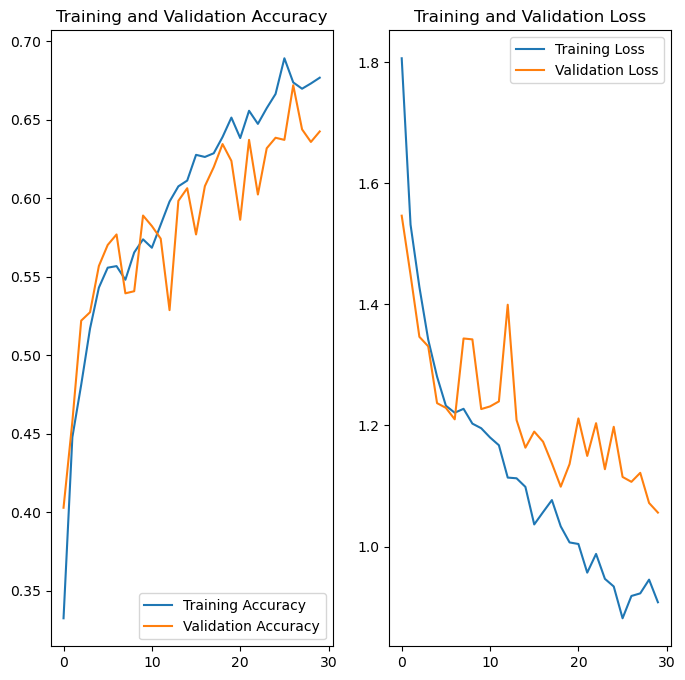

In [50]:
acc = history30.history['accuracy']
val_acc = history30.history['val_accuracy']

loss = history30.history['loss']
val_loss = history30.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
The problem of overfitting and underfitting was solved and the model was well trained for predictions. Data augmentation, outliers, and class equalization were found to be useful in improving model performance in this case.


#### Train your model for 20 more epochs

In [51]:
epochs = 20
## Your code goes here, use 30 epochs.
history20 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/20


94/94 ━━━━━━━━━━━━━━━━━━━━ 58s 614ms/step - accuracy: 0.6871 - loss: 0.8719 - val_accuracy: 0.6653 - val_loss: 1.0915
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 46s 488ms/step - accuracy: 0.6929 - loss: 0.8546 - val_accuracy: 0.6399 - val_loss: 1.1649
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 471ms/step - accuracy: 0.6792 - loss: 0.8985 - val_accuracy: 0.6158 - val_loss: 1.2136
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 464ms/step - accuracy: 0.6901 - loss: 0.8546 - val_accuracy: 0.6037 - val_loss: 1.2774
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 462ms/step - accuracy: 0.7028 - loss: 0.8285 - val_accuracy: 0.5944 - val_loss: 1.1709
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 457ms/step - accuracy: 0.6966 - loss: 0.8399 - val_accuracy: 0.6278 - val_loss: 1.1205
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 450ms/step - accuracy: 0.7118 - loss: 0.8052 - val_accuracy: 0.6560 - val_loss: 1.0800
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 471ms/step - accuracy: 0.6915 - loss: 0.8649 - val_accuracy: 0.656

#### Visualize the model results for 20 more epochs

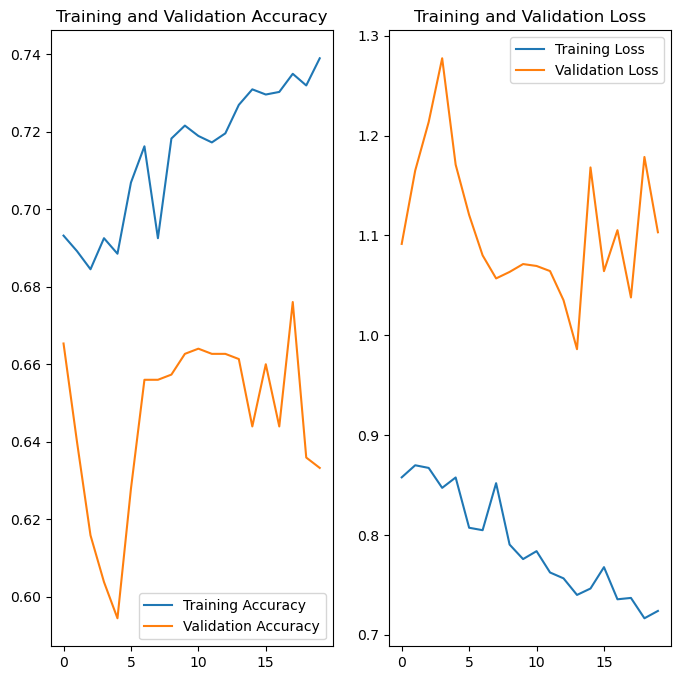

In [52]:
acc = history20.history['accuracy']
val_acc = history20.history['val_accuracy']

loss = history20.history['loss']
val_loss = history20.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Train your model for 50 more epochs

In [53]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)# your model fit code

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 47s 502ms/step - accuracy: 0.7510 - loss: 0.6987 - val_accuracy: 0.6586 - val_loss: 1.0905
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 452ms/step - accuracy: 0.7450 - loss: 0.6997 - val_accuracy: 0.6586 - val_loss: 1.1894
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 448ms/step - accuracy: 0.7288 - loss: 0.7489 - val_accuracy: 0.6841 - val_loss: 1.0153
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 477ms/step - accuracy: 0.7352 - loss: 0.7485 - val_accuracy: 0.6640 - val_loss: 1.1388
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 476ms/step - accuracy: 0.7631 - loss: 0.6740 - val_accuracy: 0.6680 - val_loss: 1.1532
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 44s 470ms/step - accuracy: 0.7333 - loss: 0.7359 - val_accuracy: 0.6787 - val_loss: 1.0590
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 453ms/step - accuracy: 0.7419 - loss: 0.6900 - val_accuracy: 0.6921 - val_loss: 1.0925
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 444ms/step - accuracy: 0.7386 - loss: 0.6946 - val_accu

####  Visualize the model results for 50 more epochs

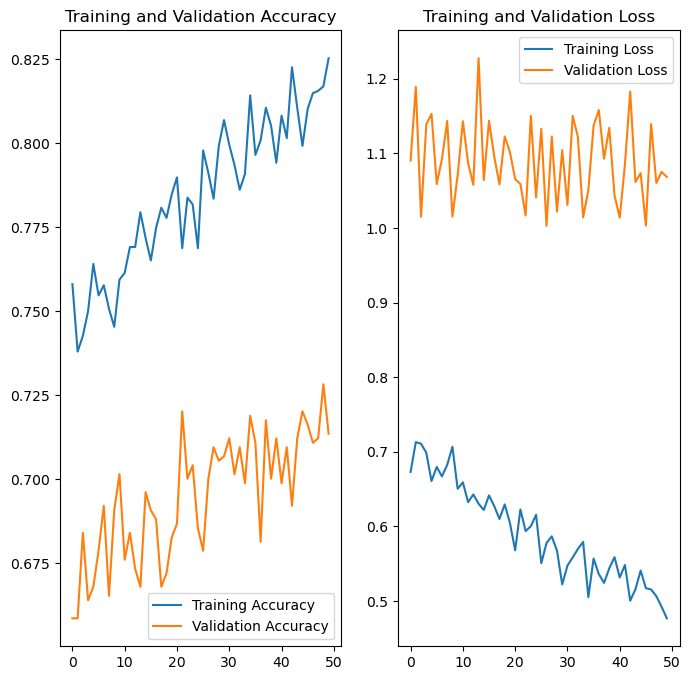

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()